In [1]:
from glycan import glycan
from glycan._prepare import normalize, getBind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_MDCK_data():
    # Create an instance of the glycan class
    g2 = glycan()

    # Read data (CSV files) as pandas data frames. Each file is a new line.
    # Note that each file can have multiple experiments, called "tabs" here.
    # You can specify how many tabs you want to read using the totalTabs variable.
    numberedExcel2, b = g2.getData('Data/H1N1_MDCK/MDCK_sheet2.csv', totalTabs=1, startExp=1)
    numberedExcel3, b = g2.getData('Data/H1N1_MDCK/MDCK_sheet3.csv', totalTabs=1, startExp=(b+1))
    numberedExcel4, b = g2.getData('Data/H1N1_MDCK/MDCK_sheet4.csv', totalTabs=2, startExp=(b+1))

    # Now combine all the data frames
    numberedExcel_temp = pd.concat([numberedExcel2, numberedExcel3, numberedExcel4], axis=0)
    mdck = numberedExcel_temp

    mdck.reset_index(drop=True, inplace=True)
    # Scaling the mean viral fluorescence by glycan density.
    mdck['MVF'] = mdck.MVF/mdck.GlycDen
    return mdck

In [3]:
# Normalize the data
numberedExcel = read_MDCK_data()
t = normalize(numberedExcel)

For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header


/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A va

In [4]:
# Create separate data frames for each glycan type
lac = t[t.GlycType == 'Lac']
twoThree = t[t.GlycType == '2-3 SiaLac']
twoSix = t[t.GlycType == '2-6 SiaLac']

In [5]:
# Function that returns a histogram of desired number of bins, given an array
def getHist(arr, bins=100):
    hist = np.histogram(arr, bins=bins)
    xVals = hist[1][:-1]
    yVals = hist[0] * 1.0/np.max(hist[0])
    return xVals, yVals

In [6]:
# Running window for smoothening the histogram
def runningWin(arr, width=2):
    newArr = np.zeros(len(arr)-width)
    for i in range(0, len(arr)-width):
            newArr[i] = np.mean((arr[i:i+width+1]))
    return newArr

In [7]:
# Create histogram of (scaled) mean viral fluorescence, for each glycan type
lacX, lacY = getHist(lac.MVF_norm, bins=100)
twoThreeX, twoThreeY = getHist(twoThree.MVF_norm, bins=100)
twoSixX, twoSixY = getHist(twoSix.MVF_norm, bins=100)

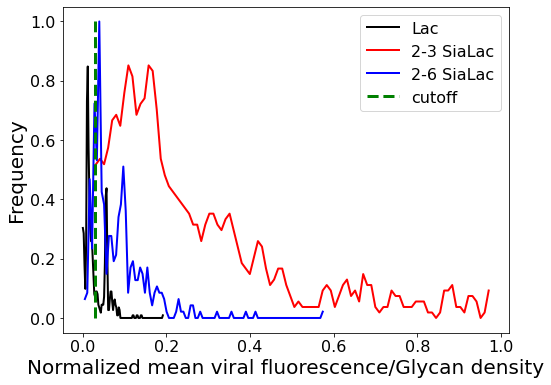

In [8]:
# Make the plot
# Then choose cutoff by visual inspection
# Represent the cutoff by a dotted line
# Save the plot

width = 1
plt.figure(figsize=(8,6))
plt.plot(lacX[:-width], runningWin(lacY, width=width), color='k', lw=2, label='Lac')
plt.plot(twoThreeX[:-width*2], runningWin(twoThreeY, width=width*2), color='r', lw=2, label='2-3 SiaLac')
plt.plot(twoSixX, twoSixY, color='b', lw=2, label='2-6 SiaLac')

#plt.legend(bbox_to_anchor=(1.0,0.5), fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Normalized mean viral fluorescence/Glycan density", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
#plt.gcf().subplots_adjust(right=0.9)

tx = 0.03 * np.ones(11)
ty = np.arange(0.0,1.1, 0.1)

plt.plot(tx, ty, lw=3, ls='--', color='g', label='cutoff')

plt.legend(fontsize=16)

plt.savefig("Plots/SelectingCutoff_scaledMVD_MDCK.pdf")

In [9]:
toSave = t.reset_index()
toSave['Experiment'] = pd.Series(['Non-binder']).repeat(toSave.shape[0]).reset_index()[0]
toSave.loc[(toSave.MVF_norm > 0.03), 'Experiment'] = 'Binder'
toSave.to_csv("Results/H1N1_MDCK_all.csv")